<a href="https://colab.research.google.com/github/suryawahyus/MachineLearning/blob/main/UAS/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [9]:
# Mengimpor torch
import torch

# Menyiapkan kode yang agnostik perangkat
device = "cuda" if torch.cuda.is_available() else "cpu"

# Menyiapkan seed acak
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Membuat dataset dengan make_moons() dari Scikit-Learn
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=RANDOM_SEED)


In [3]:
# Mengubah data menjadi DataFrame
import pandas as pd
data = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "y": y})

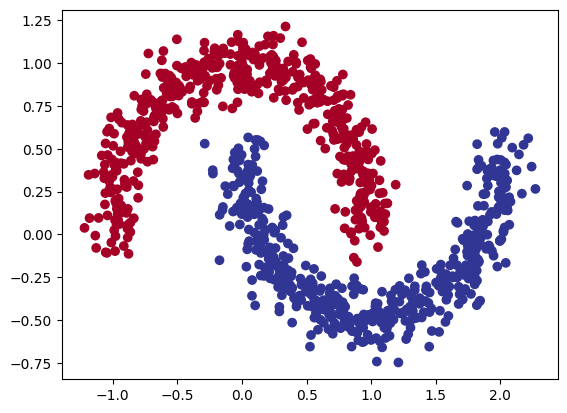

In [4]:
# Memvisualisasikan data pada scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

In [10]:
# Mengubah data menjadi tensor dengan tipe data float
X_tensor = torch.from_numpy(X).type(torch.FloatTensor)
y_tensor = torch.from_numpy(y).type(torch.FloatTensor)

# Memecah data menjadi set pelatihan dan pengujian (80% pelatihan, 20% pengujian)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=RANDOM_SEED)


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [11]:
# 2. Membangun model dengan subclassing nn.Module
import torch
from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self):
        super(MoonModelV0, self).__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.out = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        return self.out(x)

# Menginstansiasi model
model = MoonModelV0().to(device)


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [12]:
# 3. Menyiapkan fungsi loss dan optimizer untuk pelatihan model
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [15]:
# Loop pelatihan dan pengujian
epochs = 300  # Jumlah epoch dapat disesuaikan untuk mencapai akurasi lebih dari 96%
for epoch in range(epochs):
    ### Pelatihan
    model.train()
    y_pred_train = model(X_train.to(device))
    train_loss = loss_function(y_pred_train, y_train.unsqueeze(1).to(device))
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    ### Pengujian
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test.to(device))
        test_loss = loss_function(y_pred_test, y_test.unsqueeze(1).to(device))
        test_acc = acc_fn(torch.sigmoid(y_pred_test), y_test.unsqueeze(1).to(device))

    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc.item()*100:.2f}%")

# Melakukan forward pass untuk melihat apa yang keluar dari model
model.eval()
with torch.no_grad():
    logits = model(X_test.to(device))
    pred_probs = torch.sigmoid(logits)
    pred_labels = torch.round(pred_probs)

print("Logits:")
print(logits[:5])  # Menampilkan 5 logits pertama

print("Pred probs:")
print(pred_probs[:5])  # Menampilkan 5 probabilitas prediksi pertama

print("Pred labels:")
print(pred_labels[:5])  # Menampilkan 5 label prediksi pertama


Epoch 0 | Train Loss: 0.6879 | Test Loss: 0.6820 | Test Acc: 0.00%
Epoch 10 | Train Loss: 0.6152 | Test Loss: 0.6151 | Test Acc: 0.00%
Epoch 20 | Train Loss: 0.5104 | Test Loss: 0.5160 | Test Acc: 0.00%
Epoch 30 | Train Loss: 0.4063 | Test Loss: 0.4187 | Test Acc: 0.00%
Epoch 40 | Train Loss: 0.3459 | Test Loss: 0.3542 | Test Acc: 0.00%
Epoch 50 | Train Loss: 0.2961 | Test Loss: 0.2952 | Test Acc: 0.00%
Epoch 60 | Train Loss: 0.2575 | Test Loss: 0.2503 | Test Acc: 0.00%
Epoch 70 | Train Loss: 0.2299 | Test Loss: 0.2168 | Test Acc: 0.00%
Epoch 80 | Train Loss: 0.2039 | Test Loss: 0.1875 | Test Acc: 0.00%
Epoch 90 | Train Loss: 0.1776 | Test Loss: 0.1612 | Test Acc: 0.00%
Epoch 100 | Train Loss: 0.1513 | Test Loss: 0.1346 | Test Acc: 0.00%
Epoch 110 | Train Loss: 0.1254 | Test Loss: 0.1089 | Test Acc: 0.00%
Epoch 120 | Train Loss: 0.1009 | Test Loss: 0.0857 | Test Acc: 0.00%
Epoch 130 | Train Loss: 0.0798 | Test Loss: 0.0659 | Test Acc: 0.00%
Epoch 140 | Train Loss: 0.0630 | Test Loss: 0

In [14]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 4.6 MB/s eta 0:00:00


MulticlassAccuracy()

In [16]:
for epoch in range(100):  # Jumlah epoch dapat disesuaikan
    ### Pelatihan
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train.to(device))
    loss = loss_function(y_pred, y_train.unsqueeze(1).to(device))
    loss.backward()
    optimizer.step()

    ### Pengujian
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test.to(device))
        test_loss = loss_function(y_test_pred, y_test.unsqueeze(1).to(device))
        acc = acc_fn(y_test_pred, y_test.unsqueeze(1).to(device))

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss.item():.4f} | Test loss: {test_loss.item():.4f} | Accuracy: {acc.item():.4f}")


Epoch: 0 | Train loss: 0.0114 | Test loss: 0.0057 | Accuracy: 0.0000
Epoch: 10 | Train loss: 0.0109 | Test loss: 0.0053 | Accuracy: 0.0000
Epoch: 20 | Train loss: 0.0105 | Test loss: 0.0050 | Accuracy: 0.0000
Epoch: 30 | Train loss: 0.0102 | Test loss: 0.0048 | Accuracy: 0.0000
Epoch: 40 | Train loss: 0.0098 | Test loss: 0.0046 | Accuracy: 0.0000
Epoch: 50 | Train loss: 0.0096 | Test loss: 0.0043 | Accuracy: 0.0000
Epoch: 60 | Train loss: 0.0093 | Test loss: 0.0042 | Accuracy: 0.0000
Epoch: 70 | Train loss: 0.0090 | Test loss: 0.0040 | Accuracy: 0.0000
Epoch: 80 | Train loss: 0.0088 | Test loss: 0.0038 | Accuracy: 0.0000
Epoch: 90 | Train loss: 0.0086 | Test loss: 0.0036 | Accuracy: 0.0000


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

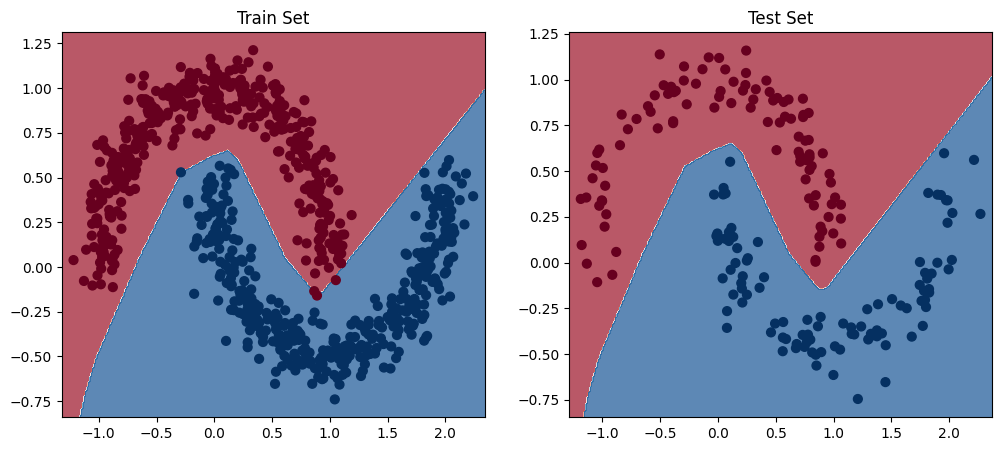

In [56]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(X, y, model):
    # Menentukan batas sumbu plot dan membuat meshgrid
    x_span = np.linspace(min(X[:, 0]) - 0.1, max(X[:, 0]) + 0.1, 300)
    y_span = np.linspace(min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1, 300)
    xx, yy = np.meshgrid(x_span, y_span)

    # Membuat prediksi di seluruh grid
    with torch.no_grad():
        grid_tensor = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(torch.FloatTensor).to(device)
        y_pred = model(grid_tensor)
        y_pred = torch.argmax(torch.softmax(y_pred, dim=1), dim=1).cpu().numpy()

    # Memplot batas keputusan
    plt.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.7, cmap=plt.cm.RdBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

# Memplot batas keputusan untuk set pelatihan dan pengujian
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train.cpu().numpy(), y_train.cpu().numpy(), model)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test.cpu().numpy(), y_test.cpu().numpy(), model)
plt.title("Test Set")
plt.show()


## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [57]:
# Membuat tensor garis lurus
x_lin = torch.linspace(-3, 3, 100)

In [58]:
# Menguji torch.tanh() pada tensor dan memplotnya
y_tanh = torch.tanh(x_lin)

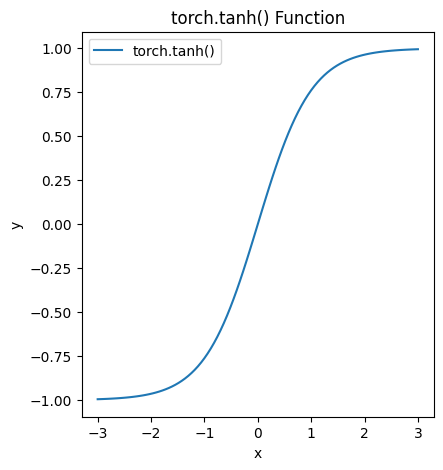

In [59]:
# Memplot fungsi tanh bawaan PyTorch
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x_lin, y_tanh, label="torch.tanh()")
plt.title("torch.tanh() Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

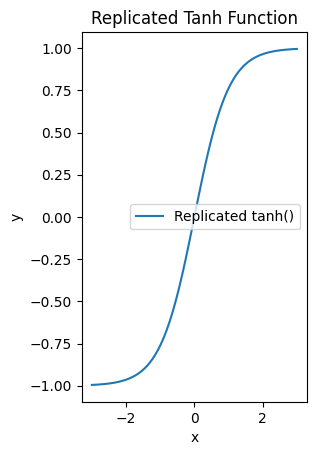

In [60]:
# Mereplikasi torch.tanh() dan memplotnya
y_tanh_replicated = (torch.exp(x_lin) - torch.exp(-x_lin)) / (torch.exp(x_lin) + torch.exp(-x_lin))

# Memplot fungsi tanh yang direplikasi
plt.subplot(1, 2, 2)
plt.plot(x_lin, y_tanh_replicated, label="Replicated tanh()")
plt.title("Replicated Tanh Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

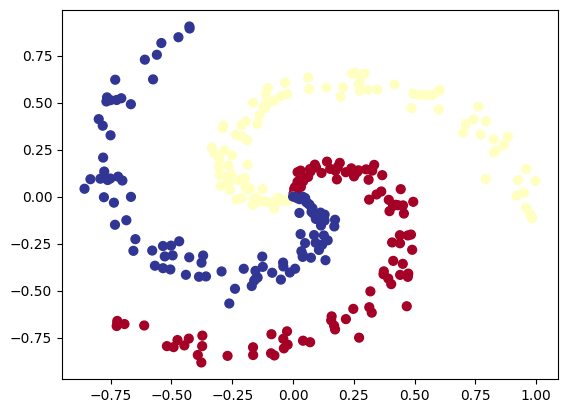

In [61]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [62]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [64]:
# Menginstal torchmetrics
!pip -q install torchmetrics

# Mengimpor Accuracy dari torchmetrics
from torchmetrics import Accuracy

# Menginisialisasi fungsi akurasi dengan menentukan task dan jumlah kelas
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [65]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Membuat model dengan subclassing nn.Module
class SpiralModel(nn.Module):
    def __init__(self):
        super(SpiralModel, self).__init__()
        self.layer_1 = nn.Linear(2, 16)
        self.layer_2 = nn.Linear(16, 16)
        self.out = nn.Linear(16, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.relu(self.layer_2(x))
        return self.out(x)

# Menginstansiasi model dan mengirimnya ke perangkat
model = SpiralModel().to(device)

In [66]:
# Mengirim data ke perangkat yang sesuai
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

# Mencetak 10 output model yang belum dilatih
print("Logits:")
with torch.no_grad():
    logits = model(X_test[:10])
print(logits)

print("Pred probs:")
pred_probs = torch.softmax(logits, dim=1)
print(pred_probs)

print("Pred labels:")
pred_labels = torch.argmax(pred_probs, dim=1)
print(pred_labels)

Logits:
tensor([[-0.1059,  0.0041, -0.2277],
        [-0.0591,  0.0222, -0.2598],
        [-0.1288,  0.0162, -0.2640],
        [-0.0406,  0.0272, -0.2732],
        [-0.1226,  0.0459, -0.3093],
        [-0.1150,  0.0606, -0.3321],
        [-0.0786,  0.0242, -0.2578],
        [-0.0873,  0.0207, -0.2538],
        [-0.1364,  0.0180, -0.2693],
        [-0.0523,  0.0173, -0.2492]], device='cuda:0')
Pred probs:
tensor([[0.3332, 0.3719, 0.2949],
        [0.3445, 0.3736, 0.2818],
        [0.3301, 0.3816, 0.2883],
        [0.3493, 0.3738, 0.2768],
        [0.3319, 0.3928, 0.2753],
        [0.3337, 0.3977, 0.2686],
        [0.3397, 0.3764, 0.2839],
        [0.3378, 0.3763, 0.2860],
        [0.3287, 0.3835, 0.2878],
        [0.3456, 0.3705, 0.2839]], device='cuda:0')
Pred labels:
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


In [67]:
# Mengatur fungsi loss dan optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 0 | Train Loss: 1.0173 | Test Loss: 1.0145 | Test Acc: 50.00%
Epoch 100 | Train Loss: 0.6540 | Test Loss: 0.6608 | Test Acc: 78.00%
Epoch 200 | Train Loss: 0.3164 | Test Loss: 0.3204 | Test Acc: 85.50%
Epoch 300 | Train Loss: 0.2424 | Test Loss: 0.2344 | Test Acc: 91.50%
Epoch 400 | Train Loss: 0.2053 | Test Loss: 0.1944 | Test Acc: 92.50%
Epoch 500 | Train Loss: 0.1596 | Test Loss: 0.1476 | Test Acc: 93.50%
Epoch 600 | Train Loss: 0.1101 | Test Loss: 0.0976 | Test Acc: 97.00%
Epoch 700 | Train Loss: 0.0715 | Test Loss: 0.0596 | Test Acc: 99.00%
Epoch 800 | Train Loss: 0.0431 | Test Loss: 0.0344 | Test Acc: 99.50%
Epoch 900 | Train Loss: 0.0288 | Test Loss: 0.0219 | Test Acc: 100.00%


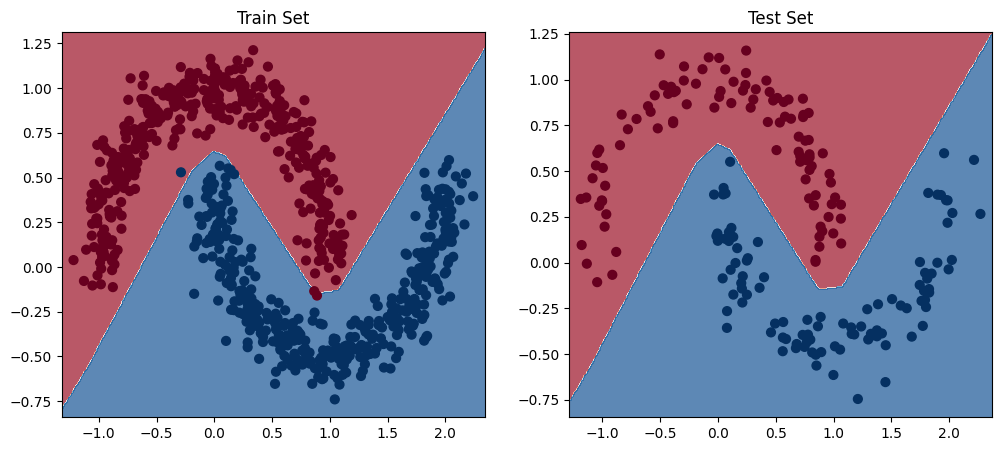

In [68]:
# Pastikan y_train dan y_test bertipe LongTensor
y_train = y_train.type(torch.LongTensor).to(device)
y_test = y_test.type(torch.LongTensor).to(device)

for epoch in range(epochs):
    # Pelatihan
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Pengujian
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)

        # Mengubah logits menjadi probabilitas kelas
        y_test_probs = torch.softmax(y_test_pred, dim=1)
        test_acc = acc_fn(y_test_probs, y_test)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f} | Test Acc: {test_acc.item()*100:.2f}%")

# Memplot batas keputusan untuk set pelatihan dan pengujian
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train.cpu().numpy(), y_train.cpu().numpy(), model)
plt.title("Train Set")
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test.cpu().numpy(), y_test.cpu().numpy(), model)
plt.title("Test Set")
plt.show()